In [1]:
import pandas as pd
titanic = pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

In [10]:
X = titanic[["pclass", "age", "sex"]]
y = titanic["survived"]
X.loc[:, "age"].fillna(X.loc[:, "age"].mean(), inplace=True)
X

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,pclass,age,sex
0,1st,29.000000,female
1,1st,2.000000,female
2,1st,30.000000,male
3,1st,25.000000,female
4,1st,0.916700,male
5,1st,47.000000,male
6,1st,63.000000,female
7,1st,39.000000,male
8,1st,58.000000,female
9,1st,71.000000,male


In [11]:
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer()
X = dvec.fit_transform(X.to_dict("record"))


In [12]:
dvec.feature_names_

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [13]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [53]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
rfc = RandomForestClassifier()

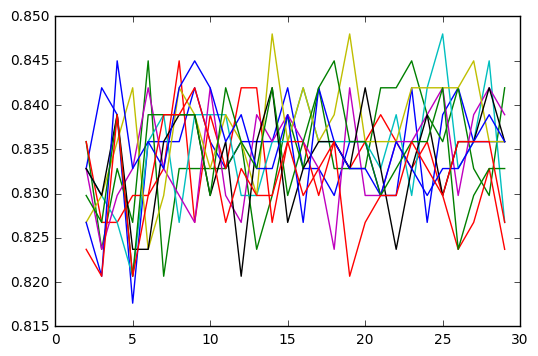

In [82]:
from sklearn.metrics import classification_report
rfc.set_params(max_depth=5, n_estimators=24)

for j in range(10):
    score = []
    for i in range(2, 30):
        rfc.set_params(n_estimators=i)
        rfc.fit(Xtrain, ytrain)
        score.append(rfc.score(Xtest, ytest))
    plt.plot(range(2, len(score) + 2), score)
#rfc_per = rfc.predict(Xtest)
#print(classification_report(rfc_per, ytest))

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=90)
gbc.fit(Xtrain, ytrain)
gbc_pre = gbc.predict(Xtest.toarray())
print(gbc.score(Xtest.toarray(), ytest))
print(classification_report(gbc_pre, ytest))

0.838905775076
             precision    recall  f1-score   support

          0       0.96      0.83      0.89       253
          1       0.60      0.88      0.72        76

avg / total       0.88      0.84      0.85       329

